**Week 10 Instructor-led Lab**

# Data Reduction

Author: Magdalena Gerharter  
Course: BGEN 632 Grad. Intro. to Python  
Term: Spring 2025

## Import Modules

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

## Set working directory

In [6]:
os.chdir("/Users/magdalenagerharter/Documents/GitHub/week10labs/data")
os.getcwd()

'/Users/magdalenagerharter/Documents/GitHub/week10labs/data'

In [7]:
hospital_data = pd.read_csv("calihospital.txt", delimiter = "\t")
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HospitalID     61 non-null     int64  
 1   Name           61 non-null     object 
 2   Zip            61 non-null     object 
 3   Website        61 non-null     object 
 4   TypeControl    61 non-null     object 
 5   Teaching       61 non-null     object 
 6   DonorType      61 non-null     object 
 7   NoFTE          61 non-null     float64
 8   NetPatRev      61 non-null     float64
 9   InOperExp      61 non-null     float64
 10  OutOperExp     61 non-null     float64
 11  OperRev        61 non-null     int64  
 12  OperInc        61 non-null     int64  
 13  AvlBeds        61 non-null     int64  
 14  Work_ID        61 non-null     int64  
 15  LastName       61 non-null     object 
 16  FirstName      61 non-null     object 
 17  Gender         61 non-null     object 
 18  PositionID  

## Prepare Data

In [9]:
hospital_data_num = hospital_data[['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']]
hospital_data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NoFTE       61 non-null     float64
 1   NetPatRev   61 non-null     float64
 2   InOperExp   61 non-null     float64
 3   OutOperExp  61 non-null     float64
 4   OperRev     61 non-null     int64  
 5   OperInc     61 non-null     int64  
 6   AvlBeds     61 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 3.5 KB


## Principal Component Analysis (PCA) in Python

### Standardize Data

In [12]:
scaler = StandardScaler()
hospital_scaled = scaler.fit_transform(hospital_data_num)

### Run PCA

In [14]:
pca = pca()
pca.fit(hospital_scaled)

eigenvalues = pca.explained_variance_
eigenvalues

array([5.72134563e+00, 1.07657967e+00, 1.91383827e-01, 9.31699632e-02,
       3.29143500e-02, 1.27322677e-03, 5.91419821e-22])

Keep the first two variables 5.72 and 1.08, as they are greater than 1. They explain the most variance in the data. After the second component they show a clear drop.

### Scree Plot

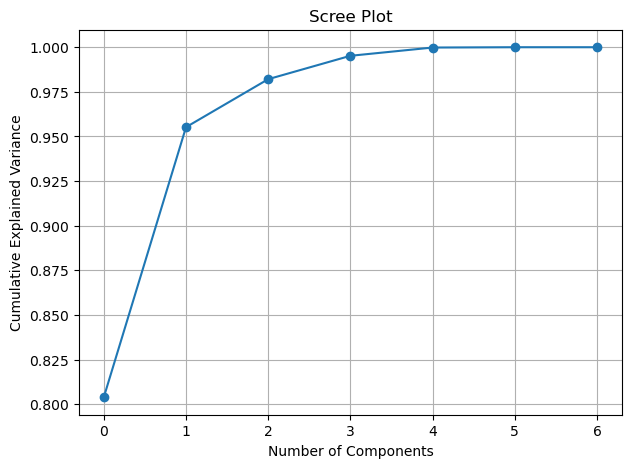

In [17]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker = 'o')
plt.ylabel('Cumulative Explained Variance') 
plt.xlabel('Number of Components') 
plt.title('Scree Plot') 
plt.grid(True)
plt.show()

When plotting the eigenvalues, you can see the flat “elbow” curve starting at component 3 — meaning additional components contribute very little.
So based on the scree plot, you should retain 3 components.

## Clustering in Python

### Choose k

In [21]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
hospital_clusters = kmeans.fit_predict(hospital_scaled)

hospital_data['Cluster'] = hospital_clusters
hospital_data[['Name', 'Cluster']].head()

,Name,Cluster
0,Mammoth Hospital,0
1,Victor Valley Community Hospital,0
2,Pioneers Memorial Hospital,0
3,Ridgecrest Regional Hospital,0
4,Barstow Community Hospital,0


I chose k = 3 because the scree plot shows a clear "elbow" at 3. This means that three clusters capture most of the important patterns in the data.

### Confusion Matrix

In [24]:
hospital_data['Teaching'] = hospital_data['Teaching'].astype(str)
hospital_data['Cluster'] = hospital_data['Cluster'].astype(str)

In [30]:
print("Teaching vs Cluster")
print(confusion_matrix(hospital_data['Teaching'], hospital_data['Cluster'])) 

print("\nTypeControl vs Cluster")
print(confusion_matrix(hospital_data['TypeControl'].astype(str), hospital_data['Cluster']))

print("\nDonorType vs Cluster")
print(confusion_matrix(hospital_data['DonorType'].astype(str), hospital_data['Cluster']))

Teaching vs Cluster
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [44  0  0  0  0]
 [ 2  3 12  0  0]]

TypeControl vs Cluster
[[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 2  0  5  0  0  0  0]
 [14  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [27  3  7  0  0  0  0]]

DonorType vs Cluster
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 2  3 12  0  0]
 [44  0  0  0  0]]


The *DonorType vs Cluster* and *Teaching vs Cluster* matrices are almost identical — and therefore equally fitting. In both cases, nearly all values fall into one cluster, with a smaller number spread across two others (e.g., 44 in one group, 2/3/12 in others).  
*TypeControl*, on the other hand, is less fitting because its values are spread out across several clusters, indicating weaker alignment.

## Additional References
Chat GPT (see Screenshot)

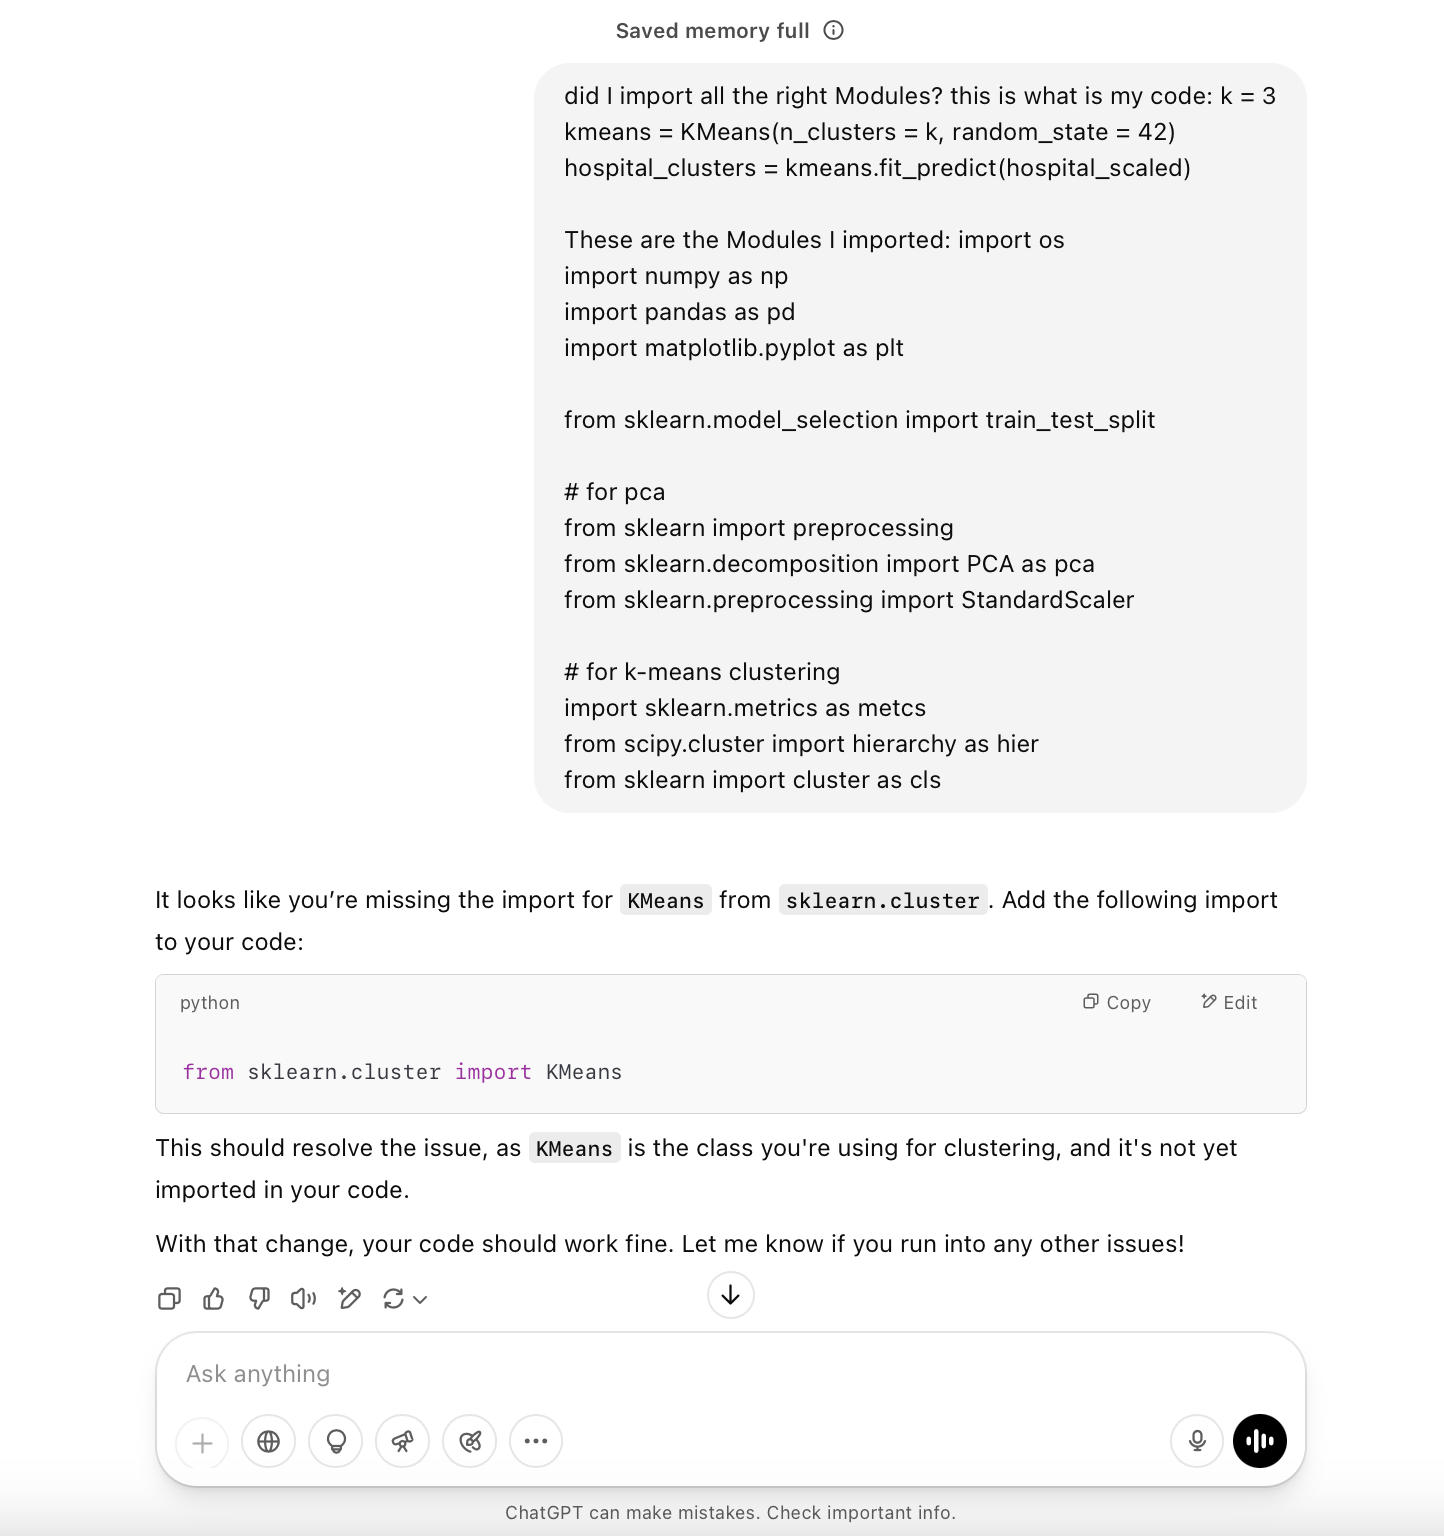

In [49]:
from PIL import Image
from IPython.display import display
img = Image.open('/Users/magdalenagerharter/Documents/GitHub/week10labs/assets/Instructor_Lab_ChatGPT.png')
display(img)